# Create Data for PCA

In [7]:
import numpy as np
import math
np.random.seed(4294967295) # random seed for consistency

mu_vec1 = np.array(50 * [0])
cov_mat1 = np.identity(50)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 75).T
# class1_sample *= 10

Populating the interactive namespace from numpy and matplotlib


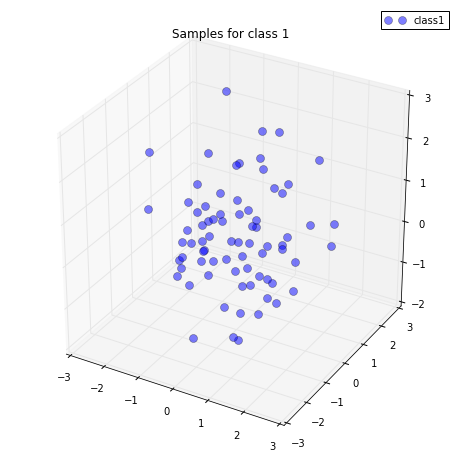

In [8]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Samples for class 1')
ax.legend(loc='upper right')

plt.show()

In [9]:
all_samples = class1_sample
print 'sample data'
np.shape(all_samples)

sample data


(50, 75)

# PCA

In [6]:
from sklearn.decomposition import PCA as sklearnPCA

In [47]:
print shape(all_samples.T)
pca = sklearnPCA(n_components=3)
fitted = pca.fit(all_samples.T)
trans = pca.transform(all_samples.T)
print shape(trans)

(30, 3)
(30, 3)


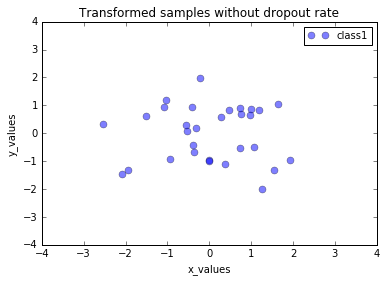

In [48]:
plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples without dropout rate')

plt.show()

# Apply Drop Out Rate ($e^{-\lambda\mu^2}$) / Gaussian Noise

I believe the proper order is:
1. generate low dim data
2. add gaussian noise to low dim
3. project back to high dim and apply drop out rate

In [49]:
lmbda = -1
mu = 2
p_0 = math.e**(lmbda * mu**2)
p_0

0.018315638888734186

In [50]:
def drop_out(p):
    return np.random.binomial(1, p, 1)[0]


In [54]:
#s = np.random.binomial(1, p_0, 100000000)
#print sum(s)/100000000.0


In [55]:
t = all_samples.T
shape(t)[0]

30

In [56]:
#gaussian noise
noise_m = .25 * np.random.randn(shape(all_samples.T)[0], shape(all_samples.T)[1]) 
noise_m

array([[-0.28753206, -0.66401355,  0.02577534],
       [ 0.03169172,  0.09250765, -0.17547145],
       [-0.02473149,  0.168621  ,  0.29161896],
       [ 0.03361804, -0.31688551,  0.0311325 ],
       [-0.22030591,  0.09927484, -0.21832539],
       [-0.27160806,  0.02739152, -0.01339484],
       [-0.10315555, -0.79022833,  0.11200322],
       [ 0.21258941,  0.14257523, -0.09688323],
       [-0.23750724, -0.62451535,  0.26216592],
       [ 0.02522286,  0.24387874,  0.4887303 ],
       [-0.11746233,  0.16259166,  0.17023133],
       [ 0.0116209 ,  0.03269888,  0.25178842],
       [-0.09288986, -0.08955321,  0.15594245],
       [-0.30738852,  0.02816851,  0.23574584],
       [-0.49939779, -0.04827743, -0.32303897],
       [ 0.45124148,  0.41352135, -0.14039321],
       [-0.35429513,  0.3471826 , -0.09942613],
       [-0.1785708 ,  0.10805867,  0.31186907],
       [-0.02069347, -0.06043492,  0.23486612],
       [-0.2552435 , -0.02398721, -0.27367725],
       [ 0.05059965, -0.15805654, -0.103

# dropped out data

In [57]:
noise_drop_matrix = all_samples.T + noise_m
for (i,j), value in numpy.ndenumerate(noise_drop_matrix):
    if (drop_out(p_0) == 1):
        noise_drop_matrix[i,j] = 0

In [58]:
noise_drop_matrix

array([[ 0.36087661,  0.00530998, -1.05476839],
       [ 0.31619277,  0.20639539,  0.69215044],
       [-0.06875751,  0.41739262, -0.69661119],
       [-0.51230467, -0.34304365,  1.03550892],
       [ 0.4240686 , -1.28610381,  0.20172903],
       [ 1.16158361,  0.11347699, -0.41470074],
       [ 0.94916689, -0.75790428, -0.0343797 ],
       [-0.73357314,  0.04893502,  1.24015819],
       [ 0.19382021,  0.73071257,  1.67173371],
       [-1.31341017, -0.83604657, -0.03213781],
       [-0.14491451, -0.75961049,  0.27266394],
       [ 0.26085641, -0.54646049, -1.0268349 ],
       [ 0.70485469,  0.57701846,  1.08414607],
       [-1.43643106,  0.5359382 ,  0.29097822],
       [-0.97331276,  0.36471505,  0.90425458],
       [ 0.93601955, -0.93758422, -2.15428349],
       [-1.5139846 ,  0.37754116, -0.84097729],
       [-0.29157392,  2.14439979, -0.501233  ],
       [ 0.17799861, -1.67802253, -1.89149991],
       [-0.95020284,  1.90503348, -0.48718235],
       [ 0.94666153,  0.00481605, -0.838

In [59]:
# pca = sklearnPCA(n_components=3)
# fitted = pca.fit(all_samples.T)
# red = np.dot(all_samples.T - pca.mean_, pca.components_.T)
# original = np.dot(red, pca.components_) + pca.mean_
#shape(all_samples.T)
# shape(original)
#test
#np.allclose(pca.inverse_transform(pca.transform(all_samples.T)), all_samples.T)

In [60]:
#--test cell--

In [61]:
fitted1 = pca.fit(noise_drop_matrix)
noise_memes = pca.transform(noise_drop_matrix)

# Visualization Check

Populating the interactive namespace from numpy and matplotlib


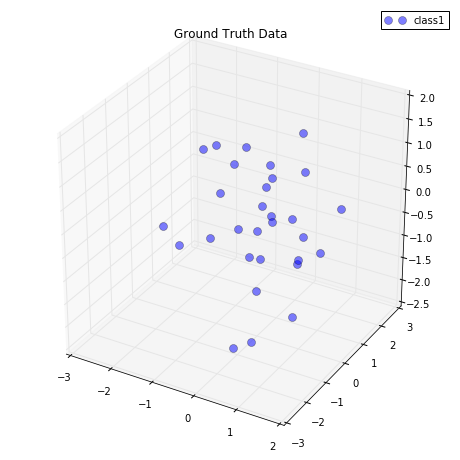

Populating the interactive namespace from numpy and matplotlib


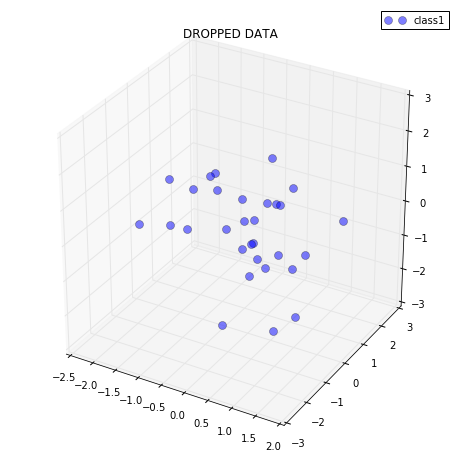

In [62]:
%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('Ground Truth Data')
ax.legend(loc='upper right')

plt.show()


%pylab inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(noise_drop_matrix.T[0,:], noise_drop_matrix.T[1,:], noise_drop_matrix.T[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')

plt.title('DROPPED DATA')
ax.legend(loc='upper right')

plt.show()

# PCA Visualization Check

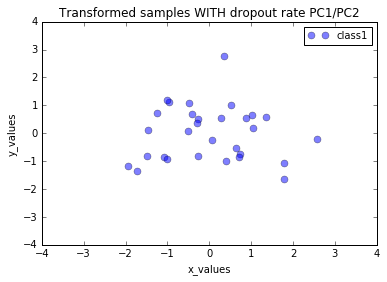

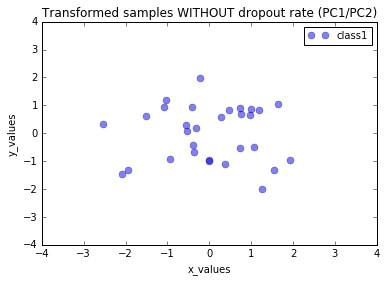

In [63]:
plt.plot(noise_memes[:,0],noise_memes[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC1/PC2')

plt.show()

plt.plot(trans[:,0],trans[:,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate (PC1/PC2)')

plt.show()

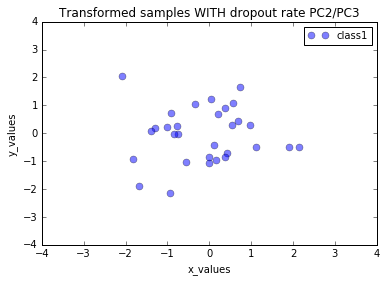

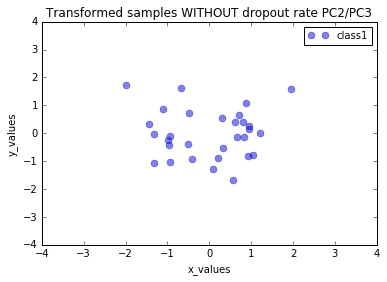

In [64]:
plt.plot(noise_drop_matrix[:,1],noise_drop_matrix[:,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITH dropout rate PC2/PC3')

plt.show()

plt.plot(trans[:,1],trans[:,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples WITHOUT dropout rate PC2/PC3')

plt.show()

# Fix time

##### 